In [1442]:

def z_factor(product1,product2):
    z=1
    y=1
    factor=1000
    if product1=='RB' and product2 =='RB':
        z=42
        y=42
    elif product1=='HO' and product2 =='HO':
        z=42
        y=42
    elif product1=='RB' and product2 =='HO':
        z=42
        y=42
    elif product1=='HO' and product2 =='RB':
        z=42
        y=42
    elif product1=='G' and product2 =='G':
        factor=100
    elif product1=='G' and product2 =='B':
        z=(1/7.45)
    elif product1=="HO" and product2=='G':
        z=1
        y=1
    
    else:
        z=1
        y=1
        factor=1000
    
    return z,y, factor
        
def create_sprd(dataframe1, dataframe2):
   
    dataframe1.reset_index(inplace=True)
    dataframe2.reset_index(inplace=True)
    date=dataframe1['Date']
    
    dataframe1.drop(columns=['Date'],inplace=True)
    dataframe2.drop(columns=['Date'],inplace=True)
    
    while True:
        sprd_type=int(raw_input('Please indicate if this is a 1) Crack or 2) Spread 3) HOGO Sprd - please input integer 1,2, or 3: '))
        
        if sprd_type==1:
            
            new_df=dataframe1*42-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        elif sprd_type==2:
            
            new_df= dataframe1-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        elif sprd_type==3:
            
            new_df=dataframe1*42-dataframe2/7.45
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        else:
            print 'You have inputted incorrectly. Please try again and enter either integer 1,2, or 3.'
    

class Mth_1(object):
    
    def __init__(self):
        pass
        
    def pdt_type1(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no1(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self,start_mth,start_day,end_mth,end_day,i,j):

        count=0
        path = os.getcwd()
        
        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string

            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only

    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #don't need this, i believe
        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change', 'Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
            
            

class Mth_2(object):
    
    def __init__(self):
        pass
        
    def pdt_type2(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no2(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self, start_mth, start_day, end_mth,end_day,i,j):

        count=0
        path = os.getcwd()

        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string
     
            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only
    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change','Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
    

        
    
import numpy as np
import pandas as pd
import os
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt  
%matplotlib inline

#user specify instrument and contract month

product1=''
month1=''
product2=''
month2=''

front_mth=Mth_1()
product1 = front_mth.pdt_type1()
month1=front_mth.mth_no1()

back_mth=Mth_2()
product2=back_mth.pdt_type2()
month2=back_mth.mth_no2()

        

Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 3
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 7
Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 2
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 7


In [1443]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [1444]:
cd $product1

C:\Users\boonsin.teo\Documents\Quandl\HO


In [1445]:
cd $month1

C:\Users\boonsin.teo\Documents\Quandl\HO\Jul


In [1446]:
start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
start_day=raw_input('Please input start day of seasonal period in DD format: ')
i=int(raw_input('Please input 1 if start mth is the same as contract year and 0 if not: '))
            
end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
j=int(raw_input('Please input 1 if end mth is the same as contract year and 0 if not: '))


front_month=front_mth.dataframe_create(start_mth,start_day,end_mth,end_day,i,j)

Please input start mth of seasonal period in MM format: 01
Please input start day of seasonal period in DD format: 01
Please input 1 if start mth is the same as contract year and 0 if not: 1
Please input end mth of seasonal period in MM format: 05
Please input end day of seasonal period in DD format: 31
Please input 1 if end mth is the same as contract year and 0 if not: 1


In [1447]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\HO


In [1448]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [1449]:
cd ..

C:\Users\boonsin.teo\Documents


In [1450]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [1451]:
cd $product2

C:\Users\boonsin.teo\Documents\Quandl\G


In [1452]:
cd $month2

C:\Users\boonsin.teo\Documents\Quandl\G\Jul


In [1453]:
back_month=back_mth.dataframe_create(start_mth, start_day,end_mth,end_day,i,j)

In [1454]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\G


In [1455]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [1456]:
cd ..

C:\Users\boonsin.teo\Documents


In [1457]:
front_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/02,0.4959,0.5977,0.5002,NaN,NaN,0.7014,0.5776,0.7145,NaN,NaN,...,1.5908,NaN,NaN,NaN,3.0195,2.9392,1.8052,NaN,NaN,1.9615
01/03,0.4916,0.5948,NaN,NaN,NaN,0.7091,0.5624,0.7224,NaN,1.1020,...,NaN,NaN,2.5644,2.9607,3.0018,2.8967,NaN,NaN,1.7214,1.9930
01/04,0.4943,NaN,NaN,0.3739,0.5728,0.7077,0.5885,NaN,NaN,1.1423,...,NaN,2.2106,2.5334,3.0224,2.9825,NaN,NaN,1.2366,1.7389,1.9919
01/05,0.4989,NaN,0.4898,0.3660,0.5647,0.7022,NaN,NaN,0.8085,1.1293,...,1.6733,2.2175,2.5660,2.9970,NaN,NaN,1.7476,1.2227,1.7404,1.9811


In [1458]:
back_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,910.25,NaN,NaN,NaN,NaN,NaN
01/02,154.75,188.75,157.0,NaN,NaN,210.00,178.50,220.25,241.25,NaN,...,485.50,NaN,NaN,NaN,927.25,924.50,551.75,NaN,516.00,582.0
01/03,156.00,187.50,NaN,NaN,NaN,212.25,178.00,222.25,NaN,NaN,...,NaN,NaN,812.00,923.75,923.75,912.25,NaN,NaN,511.50,590.0
01/04,154.50,NaN,NaN,110.75,174.5,217.25,179.25,NaN,NaN,351.5,...,NaN,688.50,791.75,944.50,915.75,NaN,NaN,373.0,509.50,590.5
01/05,155.75,NaN,155.0,110.25,177.0,219.00,NaN,NaN,248.75,348.0,...,531.25,693.25,802.25,951.25,NaN,NaN,526.25,370.0,508.75,589.0


In [1459]:
Spread_Combi=create_sprd(front_month, back_month)

Please indicate if this is a 1) Crack or 2) Spread 3) HOGO Sprd - please input integer 1,2, or 3: 3


In [1460]:
Spread_Combi.dropna(axis=0,how='all',inplace=True) # drop rows with all NAs

In [1461]:
Spread_Combi.dropna(axis=1,how='all',inplace=True)# drop columns with all NAs

In [1462]:
lookback=int(raw_input('Please input the lookback period: '))
df_ma=Spread_Combi
df_std=Spread_Combi



Please input the lookback period: 20


In [1463]:
df_ma=pd.rolling_mean(Spread_Combi,lookback)
df_std=pd.rolling_std(Spread_Combi,lookback)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).std()
  


In [1464]:
z_score=(Spread_Combi-df_ma)/df_std

In [1465]:
z_score_entry=float(raw_input('Please input the z score for trade entry as a positive float number: '))
z_score_exit=float(raw_input('Please input the z score for trade exit as a positive float number: '))

df_long_entry=z_score <= -z_score_entry
df_long_exit=z_score>=-z_score_exit
df_short_entry=z_score>=z_score_entry
df_short_exit=z_score<=z_score_exit

Please input the z score for trade entry as a positive float number: 2.1
Please input the z score for trade exit as a positive float number: 1


In [1466]:
rows=Spread_Combi.shape[0]
cols=Spread_Combi.shape[1]

In [1467]:
df_long_positions=pd.DataFrame(np.nan,index=range(0,rows),columns=range(0,cols))
df_short_positions=pd.DataFrame(np.nan,index=range(0,rows),columns=range(0,cols))

In [1468]:
df_long_entry[df_long_entry==True]=2
df_long_exit[df_long_exit==True]=-1
df_long_positions=df_long_entry+df_long_exit

df_long_positions[df_long_positions==0]=np.nan
df_long_positions[df_long_positions==-1]=0
df_long_positions[df_long_positions==2]=1

df_long_positions=df_long_positions.fillna(method='ffill')

In [1469]:
df_short_entry[df_short_entry==True]=-2
df_short_exit[df_short_exit==True]=1
df_short_positions=df_short_entry+df_short_exit

df_short_positions[df_short_positions==0]=np.nan
df_short_positions[df_short_positions==1]=0
df_short_positions[df_short_positions==-2]=-1

df_short_positions=df_short_positions.fillna(method='ffill')

In [1470]:
df_positions=df_long_positions+df_short_positions

In [1471]:
zf=z_factor(product1, product2)

In [1472]:
df_pnl=df_positions.shift(1)*(Spread_Combi*zf[0]-Spread_Combi.shift(1)*zf[1])*zf[2]

In [1473]:
df_cumpnl=df_pnl.cumsum()

In [1474]:
final_pnl=df_cumpnl.tail(1)
final_pnl.sum()

1996     2656.795973
1997     3162.934228
1998     3564.673826
1999     3101.781208
2000     5197.485906
2001     4938.846980
2002     8359.527517
2003     4943.863087
2004     5594.390604
2005     8310.817450
2006     8436.664430
2007    14955.656376
2008    19948.993289
2009    11382.153020
2010     7947.178523
2011    12918.060403
2012    10955.314094
2013     6681.355705
2014     3079.955705
2015     9065.289933
2016    10849.507383
2017     4282.100671
2018     5311.907383
dtype: float64

In [1475]:
win_percent=float(float((final_pnl[final_pnl>=0].count().sum()))/float((final_pnl.count().sum())))*100

In [1476]:
print 'The winning percentage is %.2f percent.' %win_percent
print 'The sample size is %.0f.' %final_pnl.count().sum()

The winning percentage is 100.00 percent.
The sample size is 23.


In [1477]:
print 'Total pnl over 23 years is $%.2f.'%final_pnl.sum().sum()

Total pnl over 23 years is $175645.25.


In [1478]:
z_score_date=raw_input("Please input the date to check in mm/dd format: ")

Please input the date to check in mm/dd format: 05/07


In [1479]:
z_score_year=raw_input('Please input the year of the date in which you are in: ')

Please input the year of the date in which you are in: 2018


In [1480]:
if z_score[z_score_year].loc[z_score_date]<=-z_score_entry or z_score[z_score_year].loc[z_score_date]>=z_score_entry:
    print "Trade Entry Check!"
    print 'The z-score is %.2f.' %z_score[z_score_year].loc[z_score_date] 
else:
    print 'No entry signal. Please check for exit signal if already in the trade.'
    print 'The z-score is %.2f.' %z_score[z_score_year].loc[z_score_date] 

No entry signal. Please check for exit signal if already in the trade.
The z-score is -0.17.


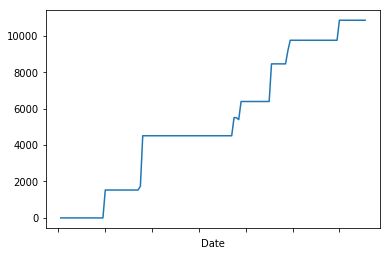

In [1481]:
#to plot equity curve
df_cumpnl['2016'].plot()

In [1482]:
df_cumpnl.min()

1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
dtype: float64

In [1483]:
#adf calculation
adf=final_pnl

In [1484]:
i=0
while i<cols:
    adf.iloc[:,i]=float(ts.adfuller(Spread_Combi.iloc[:,i])[0])
    i+=1

In [1485]:
adf.sum()

1996   -2.077312
1997   -2.166814
1998   -8.062564
1999   -2.895233
2000   -2.693352
2001   -1.457745
2002   -2.525537
2003   -3.465212
2004   -2.149877
2005   -3.843761
2006   -4.480386
2007   -7.400788
2008    1.043047
2009   -6.637287
2010   -1.116509
2011   -3.512750
2012   -1.226729
2013   -1.918624
2014   -2.495515
2015   -5.095344
2016   -7.245021
2017   -2.453058
2018   -1.913217
dtype: float64